In [49]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [50]:
df = pd.read_csv("data/spiral_dataset.csv")

In [51]:
df.head(1)

,feature1,feature2,label
0,-13.951922,1.769804,1.0


In [52]:
cols = df.shape[1]
X = df.iloc[:,:cols-1]
y = df.iloc[:,cols-1]
y = y.astype(int)

In [53]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base logistic regression model
log_reg_poly = LogisticRegression(solver='liblinear', max_iter=100)

# # Initialize the parameter grid
param_grid = {
    'poly__degree': [2, 4],  # Polynomial degrees to tune
    'bagging__n_estimators': [10, 20, 50, 75],
    'bagging__max_samples': [0.2, 0.5, 1.0],
    'bagging__max_features': [0.2, 0.5, 1.0]
}

# Initialize list to hold results
results = []

# Precompute polynomial features for each degree
precomputed_data = {}
for degree in param_grid['poly__degree']:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    precomputed_data[degree] = (X_train_poly, X_test_poly)  # Store the transformed datasets

# Perform the grid search manually



In [54]:
# Create and configure the bagging classifier
bagging_clf = BaggingClassifier(
    estimator=log_reg_poly, 
    n_estimators=10, 
    max_samples=1.0, 
    max_features=0.2, 
    random_state=42,
    oob_score=True
)

X_train_poly, X_test_poly = precomputed_data[2]

# Fit the model on the precomputed polynomial features
bagging_clf.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = bagging_clf.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
oob = bagging_clf.oob_score_

/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:875: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:881: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


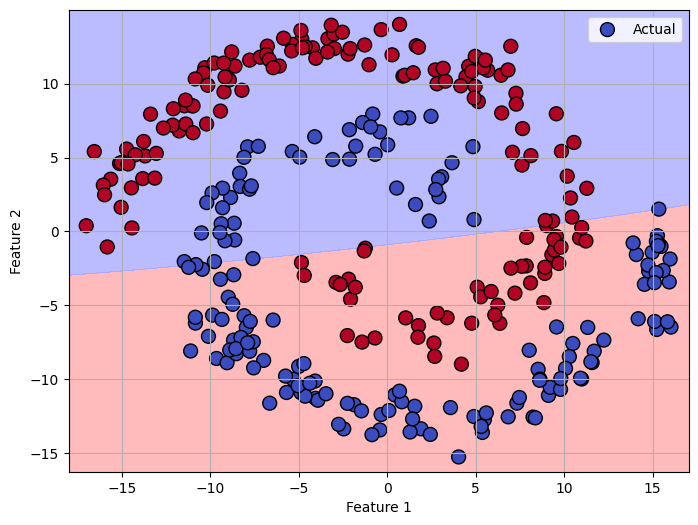

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures

# Assuming you have X_test, y_test, y_pred, and the trained classifier (bagging_clf)

# Create a meshgrid covering the range of the dataset
x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Flatten the grid and combine into one array for transformation
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Apply the same polynomial transformation that was applied to the training data
poly = PolynomialFeatures(degree=2, include_bias=False)
grid_points_poly = poly.fit_transform(grid_points)

# Use the trained classifier to predict over the grid
Z = bagging_clf.predict(grid_points_poly)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Red and blue for background classes
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.8)

# Overlay actual values from the test set (apply the transformation here as well)
X_test_poly = poly.transform(X_test)  # Ensure to apply the same transformation to X_test
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=100, label='Actual')

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
#plt.title('Decision Boundary with Actual Values (Polynomial Features)')

# Adding legend
plt.legend()
plt.grid(True)
plt.savefig("result_plots/spiral_100_2.pdf")
plt.show()


In [56]:
# Create and configure the bagging classifier
bagging_clf = BaggingClassifier(
    estimator=log_reg_poly, 
    n_estimators=10, 
    max_samples=0.6, 
    max_features=1.0, 
    random_state=42,
    oob_score=True
)

X_train_poly, X_test_poly = precomputed_data[4]

# Fit the model on the precomputed polynomial features
bagging_clf.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = bagging_clf.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
oob = bagging_clf.oob_score_

/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:875: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:881: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


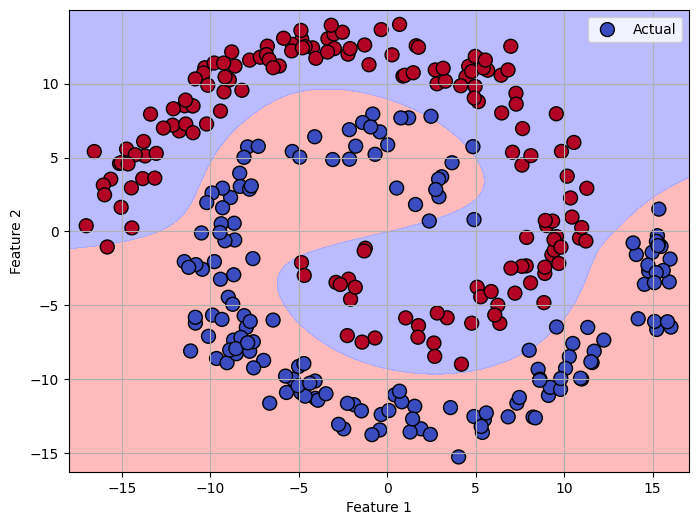

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures

# Assuming you have X_test, y_test, y_pred, and the trained classifier (bagging_clf)

# Create a meshgrid covering the range of the dataset
x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Flatten the grid and combine into one array for transformation
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Apply the same polynomial transformation that was applied to the training data
poly = PolynomialFeatures(degree=4, include_bias=False)
grid_points_poly = poly.fit_transform(grid_points)

# Use the trained classifier to predict over the grid
Z = bagging_clf.predict(grid_points_poly)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Red and blue for background classes
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.8)

# Overlay actual values from the test set (apply the transformation here as well)
X_test_poly = poly.transform(X_test)  # Ensure to apply the same transformation to X_test
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=100, label='Actual')

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
#plt.title('Decision Boundary with Actual Values (Polynomial Features)')

# Adding legend
plt.legend()
plt.grid(True)
plt.savefig("result_plots/spiral_dec_4.pdf")
plt.show()


In [58]:
# Create and configure the bagging classifier
bagging_clf = BaggingClassifier(
    estimator=log_reg_poly, 
    n_estimators=300, 
    max_samples=1.0, 
    max_features=1.0, 
    random_state=42,
    oob_score=True
)

X_train_poly, X_test_poly = precomputed_data[2]

# Fit the model on the precomputed polynomial features
bagging_clf.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = bagging_clf.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
oob = bagging_clf.oob_score_

/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


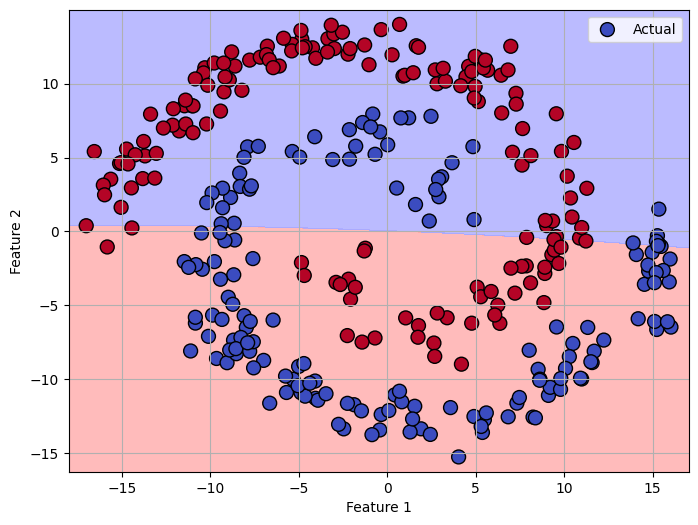

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures

# Assuming you have X_test, y_test, y_pred, and the trained classifier (bagging_clf)

# Create a meshgrid covering the range of the dataset
x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Flatten the grid and combine into one array for transformation
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Apply the same polynomial transformation that was applied to the training data
poly = PolynomialFeatures(degree=2, include_bias=False)
grid_points_poly = poly.fit_transform(grid_points)

# Use the trained classifier to predict over the grid
Z = bagging_clf.predict(grid_points_poly)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Red and blue for background classes
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.8)

# Overlay actual values from the test set (apply the transformation here as well)
X_test_poly = poly.transform(X_test)  # Ensure to apply the same transformation to X_test
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=100, label='Actual')

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
#plt.title('Decision Boundary with Actual Values (Polynomial Features)')

# Adding legend
plt.legend()
plt.grid(True)
plt.savefig("result_plots/spiral_300_dec.pdf")
plt.show()


In [60]:
df = pd.read_csv("data/outlier_dataset.csv")

In [61]:
df.head(1)

,feature1,feature2,label
0,-0.898927,0.278866,0.0


In [62]:
cols = df.shape[1]
X = df.iloc[:,:cols-1]
y = df.iloc[:,cols-1]
y = y.astype(int)

In [63]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base logistic regression model
log_reg_poly = LogisticRegression(solver='liblinear', max_iter=100)

# # Initialize the parameter grid
param_grid = {
    'poly__degree': [4],  # Polynomial degrees to tune
    'bagging__n_estimators': [10, 20, 50, 75],
    'bagging__max_samples': [0.2, 0.5, 1.0],
    'bagging__max_features': [0.2, 0.5, 1.0]
}

# Initialize list to hold results
results = []

# Precompute polynomial features for each degree
precomputed_data = {}
for degree in param_grid['poly__degree']:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    precomputed_data[degree] = (X_train_poly, X_test_poly)  # Store the transformed datasets

# Perform the grid search manually



In [64]:
# Create and configure the bagging classifier
bagging_clf = BaggingClassifier(
    estimator=log_reg_poly, 
    n_estimators=20, 
    max_samples=1.0, 
    max_features=1.0, 
    random_state=42,
    oob_score=True
)

X_train_poly, X_test_poly = precomputed_data[4]

# Fit the model on the precomputed polynomial features
bagging_clf.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = bagging_clf.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
oob = bagging_clf.oob_score_

/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:875: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:881: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


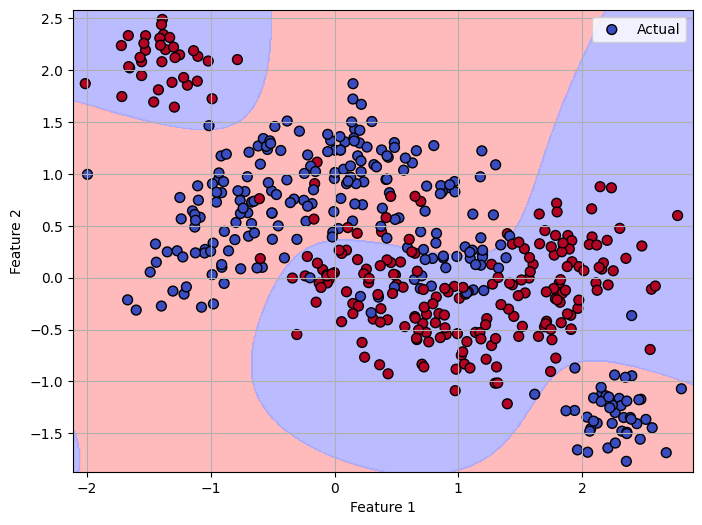

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures

# Assuming you have X_test, y_test, y_pred, and the trained classifier (bagging_clf)

# Create a meshgrid covering the range of the dataset
x_min, x_max = X_test.iloc[:, 0].min() - 0.1, X_test.iloc[:, 0].max() + 0.1
y_min, y_max = X_test.iloc[:, 1].min() - 0.1, X_test.iloc[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Flatten the grid and combine into one array for transformation
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Apply the same polynomial transformation that was applied to the training data
poly = PolynomialFeatures(degree=4, include_bias=False)
grid_points_poly = poly.fit_transform(grid_points)

# Use the trained classifier to predict over the grid
Z = bagging_clf.predict(grid_points_poly)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Red and blue for background classes
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.8)

# Overlay actual values from the test set (apply the transformation here as well)
X_test_poly = poly.transform(X_test)  # Ensure to apply the same transformation to X_test
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=50, label='Actual')

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
#plt.title('Decision Boundary with Actual Values (Polynomial Features)')

# Adding legend
plt.legend()
plt.grid(True)
plt.savefig("result_plots/valid_decision.pdf")
plt.show()


In [66]:
df = pd.read_csv("data/irrelevant_dataset.csv")

In [67]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is already defined with features and target
cols = df.shape[1]
X = df.iloc[:, :cols-1]
y = df.iloc[:, cols-1]
y = y.astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit logistic regression on the transformed dataset
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_pca)

# Calculate test set accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {accuracy:.2f}')


Test set accuracy: 0.85
